# Midterm

### Data Sources
* https://data.lacity.org/Administration-Finance/Listing-of-Active-Businesses/6rrh-rzua/data
* https://data.lacity.org/Administration-Finance/Listing-of-All-Businesses/r4uk-afju/data
* https://healthyplacesindex.org/data-reports/

## Research Questions
1. How has the COVID-19 pandemic impacted businesses in the LA area, particulary those deemed *essential*?
2. Does the count and distrubtion of essential businesses across the LA area bear serious impact on communities? In other words, does having essential businesses (or lack thereof) in your area affect the conditons of your community?

## Importing Data Libraries and Dataset

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
# for basemaps 
import contextily as ctx

In [3]:
la_biz=pd.read_csv('Data/OpenRefine-Active-LA-Business.csv') #Cleaned dataset of Active LA Businesses

In [4]:
closed_biz=pd.read_csv('Data/Closed_Biz.csv') #Cleaned dataset of Closed LA Businesses

In [6]:
essential = pd.read_csv('Data/Essential Businesses (5).csv') #?

In [8]:
HPI = gpd.read_file('Data/HPI/HPI_CTs_2018_04_04.shp') #Dataset for HPI

## Preliminary Inspection (Might need to do inspection for essential and HPI?

In [19]:
la_biz.shape

(391042, 18)

Output: There are 391042 rows and 18 columns.

In [20]:
closed_biz.shape

(465498, 1)

Output: There are 465498 rows and 1 columns. There is only 1 column because I cleaned the dataset prior to only keep this one relevant column.

In [21]:
la_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391042 entries, 0 to 391041
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOCATION ACCOUNT #         391042 non-null  object 
 1   BUSINESS NAME              391042 non-null  object 
 2   DBA NAME                   135031 non-null  object 
 3   STREET ADDRESS             391042 non-null  object 
 4   CITY                       391038 non-null  object 
 5   ZIP CODE                   391042 non-null  object 
 6   LOCATION DESCRIPTION       391041 non-null  object 
 7   MAILING ADDRESS            180818 non-null  object 
 8   MAILING CITY               180823 non-null  object 
 9   MAILING ZIP CODE           180774 non-null  object 
 10  NAICS                      391042 non-null  int64  
 11  PRIMARY NAICS DESCRIPTION  391042 non-null  object 
 12  COUNCIL DISTRICT           391042 non-null  int64  
 13  LOCATION START DATE        39

Output: Each column doesn't have the same non-null count, which indicates that there are empty/null fields in the dataset. There are a mix of object, int64, and float64. For the time and bar charts, I am only focusing on the "YEARS ONLY" and "PRIMARY NAICS DESCRIPTION," respectively.

In [22]:
closed_biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465498 entries, 0 to 465497
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   YEAR    465498 non-null  int64
dtypes: int64(1)
memory usage: 3.6 MB


Output: There is only one column, "YEAR," which I manually filtered in Microsoft Excel before uploading to Jupyter Notebook. This will be used to create a time chart detailing the count of LA businesses and when they closed.

## Making a Time Chart: Active Businesses vs Closed Businesses

### Active Businesses

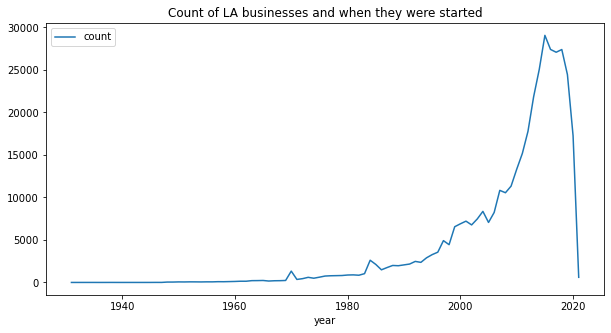

In [23]:
la_biz['YEARS ONLY'] = la_biz['YEARS ONLY'].astype(object) #convert int64 to object
la_date = la_biz['YEARS ONLY'].value_counts().reset_index() #create a dataframe out of 'YEARS ONLY' column
la_date = la_date.rename(columns={'index':'year','YEARS ONLY':'count'}) #rename header columns
la_date = la_date.sort_values(by='year') #sort by year
la_date.plot(figsize=(10,5), x='year', title='Count of LA businesses and when they were started') #plot

Output: This time chart shows the count of active businesses and the year they started. It's important to pay attention to the peaks and dips of the chart, as they allude to external factors, such as recessions, pandemics, and federal intervention, that may have affected job prospects--either postively or negatively. From 2007 to 2009, there are massive dips in the chart which mean a low count of newly started businesses. This is indicative of the job market during this time, as the United States was undergoing the *Great Recession*. Shifting to 2020 approaching to 2021, there is steep decline in newly businesses, which is greatly attributed to the COVID-19 pandemic and resulting economic downturn.

### Closed Businesses

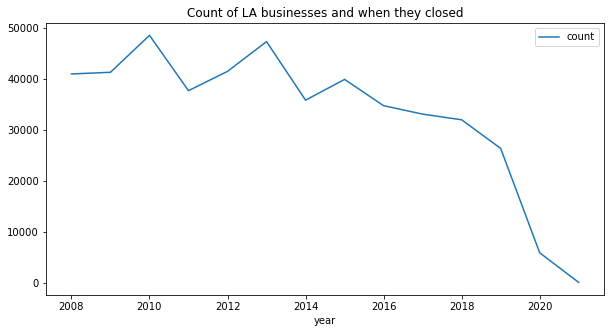

In [24]:
closed_biz['YEAR'] = closed_biz['YEAR'].astype(object) #convert int64 to object
closed = closed_biz['YEAR'].value_counts().reset_index() #create a dataframe out of 'YEARS ONLY' column
closed = closed.rename(columns={'index':'year','YEAR':'count'}) #rename header columns
closed = closed.sort_values(by='year') #sort by year
closed.plot(figsize=(10,5), x='year', title='Count of LA businesses and when they closed') #plot

Output: This time chart should show inverse patterns to the previous one, as it now focuses on closed businesses in LA. Harking back to 2007 to 2009 (*The Great Recession*), we see large spikes in the chart which indicate massive business closures. While not as drastic as during the *Great Recession*, there still is a significant number of business closures--approximately 10,000 closed businesses within the past year.

## Making Bar Charts

In [25]:
NAICS_count = la_biz['PRIMARY NAICS DESCRIPTION'].value_counts().reset_index()
NAICS_count

,index,PRIMARY NAICS DESCRIPTION
0,Lessors of real estate (including mini warehou...,34168
1,All other personal services,26026
2,"Independent artists, writers, & performers",24900
3,Motion picture & video industries (except vide...,12104
4,"All other professional, scientific, & technica...",11177
...,...,...
284,Telecommunications Resellers,5
285,Interurban & rural bus transportation,5
286,Other amusement & recreation services (includi...,5
287,Other direct selling establishments (including...,3


Output: The output is now a dataframe based on the 'PRIMARY NAICS DESCRIPTION' and contains all description alongside the respective counts. This dataset will be used to create the bar chart.

In [26]:
NAICS_count=NAICS_count.rename(columns={'index':'Industry Type','PRIMARY NAICS DESCRIPTION':'Count'})
NAICS_count

,Industry Type,Count
0,Lessors of real estate (including mini warehou...,34168
1,All other personal services,26026
2,"Independent artists, writers, & performers",24900
3,Motion picture & video industries (except vide...,12104
4,"All other professional, scientific, & technica...",11177
...,...,...
284,Telecommunications Resellers,5
285,Interurban & rural bus transportation,5
286,Other amusement & recreation services (includi...,5
287,Other direct selling establishments (including...,3


Output: The dataframe now has more appropriate column headers that will make the bar chart more readable. 

In [27]:
Top_10= NAICS_count.head(10) #Create a new handler that only contains the first 10 rows of the dataframe
Asc= Top_10.sort_values(by='Count',ascending=True) #sort by count then assign to new handler

In [28]:
fig = px.bar(Asc, #plot
       x='Count',
       y='Industry Type',
       orientation='h',
       title='Top 10 Indsutry Types in LA',)
fig.update_layout( #configure the bar chart
    margin= dict(l=450,r=0),
    font=dict(size=10))
fig

Output: The output shows the Top 10 Dominating Industries in LA categoraized by NAICS description. The largest industry at the moment is "Lessors of real state," which include landlords and property management. While industries, such as "Lessors of real estate" and "Janitorial services," are considered essential, things like "Independent artists, writers, & performers" and "Motion picture & video industries" are not. It is interesting too see so many non-essential businesses saturating the workforce.

In [29]:
Bottom_10= NAICS_count.tail(10) 
Bottom_10
Desc= Bottom_10.sort_values(by='Count',ascending= False)

In [30]:
fig = px.bar(Desc, #plot
       x='Count',
       y='Industry Type',
       orientation='h',
       title='Bottom 10 Indsutry Types in LA',)
fig.update_layout( #configure the bar chart
    margin= dict(l=850,r=0),
    font=dict(size=10))
fig

Output: The output shows the Bottom 10 Industries in LA categoraized by NAICS description. The purpose of this bar chart is to juxtapose the previous one to paint a larger picture of business landscape.

## COVID-Related Essential Businesses

In [31]:
essential=pd.read_csv('Data/Essential Businesses (5).csv') #import dataset that has been filterd to only contain desired NAICS codes

In [32]:
essential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45609 entries, 0 to 45608
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LOCATION ACCOUNT #         45609 non-null  object 
 1   BUSINESS NAME              45609 non-null  object 
 2   DBA NAME                   8692 non-null   object 
 3   STREET ADDRESS             45609 non-null  object 
 4   CITY                       45609 non-null  object 
 5   ZIP CODE                   45609 non-null  object 
 6   LOCATION DESCRIPTION       45609 non-null  object 
 7   MAILING ADDRESS            33824 non-null  object 
 8   MAILING CITY               33823 non-null  object 
 9   MAILING ZIP CODE           33821 non-null  object 
 10  NAICS                      45609 non-null  int64  
 11  PRIMARY NAICS DESCRIPTION  45609 non-null  object 
 12  COUNCIL DISTRICT           45609 non-null  int64  
 13  LOCATION START DATE        45609 non-null  obj

Output: We plan on creating a bar chart, so we will only use the "PRIMARY NAICS DESCRIPTION" column.

In [33]:
essential["PRIMARY NAICS DESCRIPTION"].unique().tolist() #show distinct values of NAICS description

['Medical & diagnostic laboratories',
 'Grocery stores (including supermarkets & convenience stores without gas)',
 'Hospitals',
 'Lessors of real estate (including mini warehouses & self-storage units)',
 'Individual & family services',
 'Other ambulatory health care services (including ambulance services, blood, & organ banks)']

Output: We are choosing to focus on essential businesses that pertain to healthcare, food access, and housing. 

In [34]:
NAICS_count = essential['PRIMARY NAICS DESCRIPTION'].value_counts().reset_index() #create a new dataframe
NAICS_count

,index,PRIMARY NAICS DESCRIPTION
0,Lessors of real estate (including mini warehou...,40484
1,Individual & family services,1900
2,Grocery stores (including supermarkets & conve...,1720
3,Medical & diagnostic laboratories,733
4,Other ambulatory health care services (includi...,405
5,Hospitals,367


In [35]:
NAICS_count=NAICS_count.rename(columns={'index':'Industry Type','PRIMARY NAICS DESCRIPTION':'Count'})
NAICS_count

,Industry Type,Count
0,Lessors of real estate (including mini warehou...,40484
1,Individual & family services,1900
2,Grocery stores (including supermarkets & conve...,1720
3,Medical & diagnostic laboratories,733
4,Other ambulatory health care services (includi...,405
5,Hospitals,367


In [36]:
NAICS_count= NAICS_count.sort_values(by='Count') #sort by count
fig = px.bar(NAICS_count, #plot
       x='Count',
       y='Industry Type',
       orientation='h',
       title='5 COVID-Related Essential Businesses',)
fig.update_layout( #configure bar chart
    margin= dict(l=450,r=0),
    font=dict(size=10))
fig

Output: After researching which business NAICS codes were considered essential, we singled five businesses that bear  strong impact on communities especially during the COVID-19 pandemic. We settled on business that focuses on concerns relating to housing ("Lessors of real estate), social care ("Individual & family services), food access ("Grocery stores), and health care ("Medical laboratories, Ambulatory services, and Hospitals"). Evidently, we are interested in businesses that play a critical role is sustatining the livelihood and outlook of communities. 

# Map Visualizations

## Essential Businesses

Here, we are mapping active businesses in LA up until 12/31/2020. This map can be filtered by a particular essential business by clicking on the legend. Each of our selected essential businesses is captured by their NAICS code (North American Industry Classification System). 

In [37]:
fig = px.scatter_mapbox(essential,
                        lat='LATITUDE',
                        lon='LONGITUDE',
                        color = "PRIMARY NAICS DESCRIPTION",
                        mapbox_style="stamen-terrain")
fig.show()

Our purpose in making this map is to see how the essential businesses are spread out across Los Angeles.

## HPI Data

Here, we subset the HPI object we created earlier to only include the LA County.

In [12]:
HPI_LA = HPI[HPI["County_FIP"] == "6037"]

We then reproject to web mercator so that we can add a base map. This static visualization describes the HPI (hpi2score) for each tract in the LA County. The alpha was set so that we can see the basemap boundaries and the y-limit was set to exclude unnecessary data (California Islands).

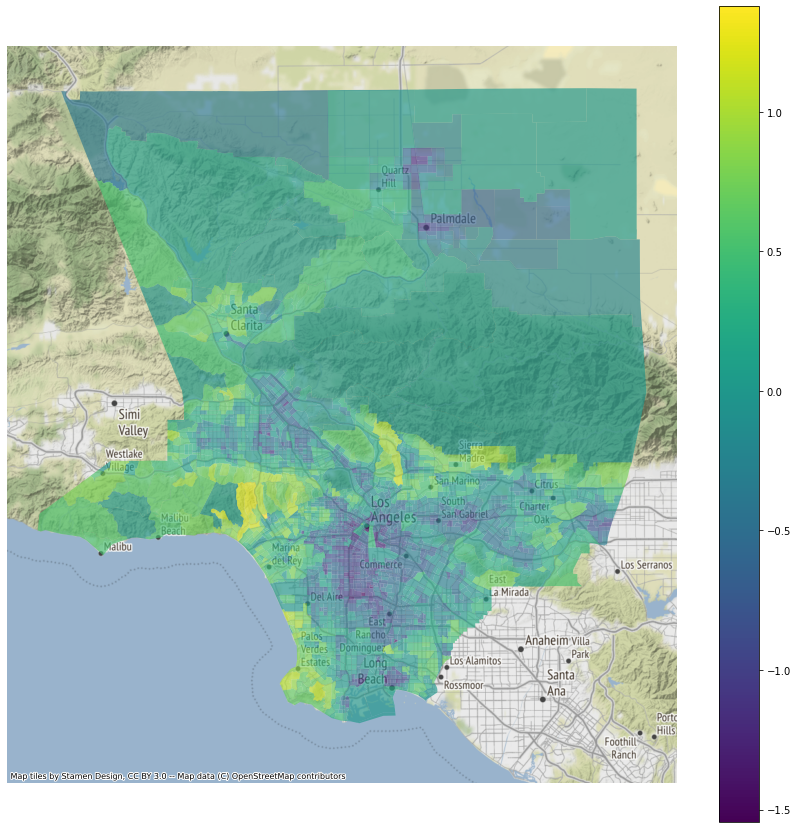

In [39]:
# reproject to web mercator
gdf_web_mercator = HPI_LA.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(15,15))

gdf_web_mercator.plot(ax=ax,figsize=(10,10), column='hpi2score', alpha=0.65, legend=True) 

ax.axis('off')
ax.set_ylim(3975000, 4150000)

ctx.add_basemap(ax)

This visualization shows that poor HPI is largely concentrated in the Downtown LA area, though there are other pockets of poor HPI. Our focus for this project will be on the health of DTLA. 